# In this notebook Pyridine is made and solved with RHF

In [2]:
import numpy as np
from sympy import symbols, Matrix, simplify
import matplotlib.pyplot as plt
from pyscf import gto, scf
from scipy.linalg import fractional_matrix_power
import sys
sys.path.append('/workspaces/Huckel-on-benzene/project/Benzene/rhf')
import plottingsystem as pts
import sys
sys.path.append('/workspaces/Huckel-on-benzene/project/Benzene/Huckel')
from class_huckel import huckel

In [3]:
Pyridine ="""
  C    1.1876995   -0.7009823    0.0000000
  C    1.2084719    0.6964269    0.0000000
  C    0.0000000    1.3969287   -0.0000000
  C   -1.2084719    0.6964269   -0.0000000
  C   -1.1876995   -0.7009823   -0.0000000
  N   -0.0000000   -1.3644574    0.0000000
  H    2.1152123   -1.2577675    0.0000000
  H    2.1502427    1.2297766    0.0000000
  H    0.0000000    2.4792591   -0.0000000
  H   -2.1502427    1.2297766   -0.0000000
  H   -2.1152123   -1.2577675   -0.0000000
  """

In [4]:
extra_bounds = [(0,5)]
coordinates = pts.taking_x_and_y_coordinate(pts.taking_carbon_coordinates(Pyridine))
print(coordinates)

[[ 1.1876995 -0.7009823]
 [ 1.2084719  0.6964269]
 [ 0.         1.3969287]
 [-1.2084719  0.6964269]
 [-1.1876995 -0.7009823]
 [-0.        -1.3644574]]


In [5]:
Pyridine_molecule = gto.M(atom=Pyridine, basis='sto-6g')#'ccpvdz''6-311++G**'
pz_indices = pts.taking_indices(Pyridine_molecule, ['C 2pz', 'N 2pz'])

print(pz_indices)
hf = scf.RHF(Pyridine_molecule)
hf_energy = hf.kernel()

[4, 9, 14, 19, 24, 29]
converged SCF energy = -246.023950113337


In [6]:
print(Pyridine_molecule.ao_labels())

['0 C 1s    ', '0 C 2s    ', '0 C 2px   ', '0 C 2py   ', '0 C 2pz   ', '1 C 1s    ', '1 C 2s    ', '1 C 2px   ', '1 C 2py   ', '1 C 2pz   ', '2 C 1s    ', '2 C 2s    ', '2 C 2px   ', '2 C 2py   ', '2 C 2pz   ', '3 C 1s    ', '3 C 2s    ', '3 C 2px   ', '3 C 2py   ', '3 C 2pz   ', '4 C 1s    ', '4 C 2s    ', '4 C 2px   ', '4 C 2py   ', '4 C 2pz   ', '5 N 1s    ', '5 N 2s    ', '5 N 2px   ', '5 N 2py   ', '5 N 2pz   ', '6 H 1s    ', '7 H 1s    ', '8 H 1s    ', '9 H 1s    ', '10 H 1s    ']


In [7]:
mo_coeff = hf.mo_coeff.round(6)
mo_coeff = pts.normaliseer(mo_coeff)
print(mo_coeff)

[[ 3.43208750e-04 -7.06859231e-01  7.06869865e-01 ...  3.79506953e-02
  -1.93039878e-03  2.18511514e-02]
 [-4.16466759e-03 -1.58565907e-02  1.56038166e-02 ... -2.86924903e-01
  -3.65422352e-03 -1.71606095e-01]
 [ 3.17317564e-03  5.36353925e-04 -1.87804190e-04 ...  2.42077754e-01
  -2.26856103e-01  2.31259021e-01]
 ...
 [-1.90671528e-05 -0.00000000e+00 -4.11763198e-05 ... -0.00000000e+00
   0.00000000e+00 -1.68808120e-01]
 [ 2.20777559e-05 -4.21851402e-05 -1.03442950e-04 ... -2.82929668e-01
   7.04050352e-03  1.71005120e-01]
 [-7.82756799e-05 -3.03130365e-03 -3.11333150e-03 ...  4.70249482e-02
  -3.96983796e-03 -1.24018384e-01]]


In [8]:
mo_eigenvalues = hf.mo_energy[[16,19,20,21,22,23]]
print(mo_eigenvalues)
pz_AO_MO = mo_coeff[[4, 9, 14, 19, 24, 29]][:,[16,19,20,21,22,23]]


print(pz_AO_MO)

pz_AO_MO = mo_coeff[pz_indices][:,[16,19,20,21,22,23]]

print(pz_AO_MO)

[-0.48574705 -0.31493293 -0.30197429  0.2364293   0.24093002  0.46867821]
[[ 0.42991805 -0.25634124 -0.50610293 -0.30125228  0.49649805  0.3982109 ]
 [ 0.37590681  0.31953462 -0.49382165 -0.275879   -0.5034776  -0.41989723]
 [ 0.36360584  0.58724189 -0.          0.58184904 -0.          0.42184272]
 [ 0.37590681  0.31953462  0.49382165 -0.275879    0.5034776  -0.41989723]
 [ 0.42991805 -0.25634124  0.50610293 -0.30125228 -0.49649805  0.3982109 ]
 [ 0.46424118 -0.56526149  0.          0.57247478 -0.         -0.39022752]]
[[ 0.42991805 -0.25634124 -0.50610293 -0.30125228  0.49649805  0.3982109 ]
 [ 0.37590681  0.31953462 -0.49382165 -0.275879   -0.5034776  -0.41989723]
 [ 0.36360584  0.58724189 -0.          0.58184904 -0.          0.42184272]
 [ 0.37590681  0.31953462  0.49382165 -0.275879    0.5034776  -0.41989723]
 [ 0.42991805 -0.25634124  0.50610293 -0.30125228 -0.49649805  0.3982109 ]
 [ 0.46424118 -0.56526149  0.          0.57247478 -0.         -0.39022752]]


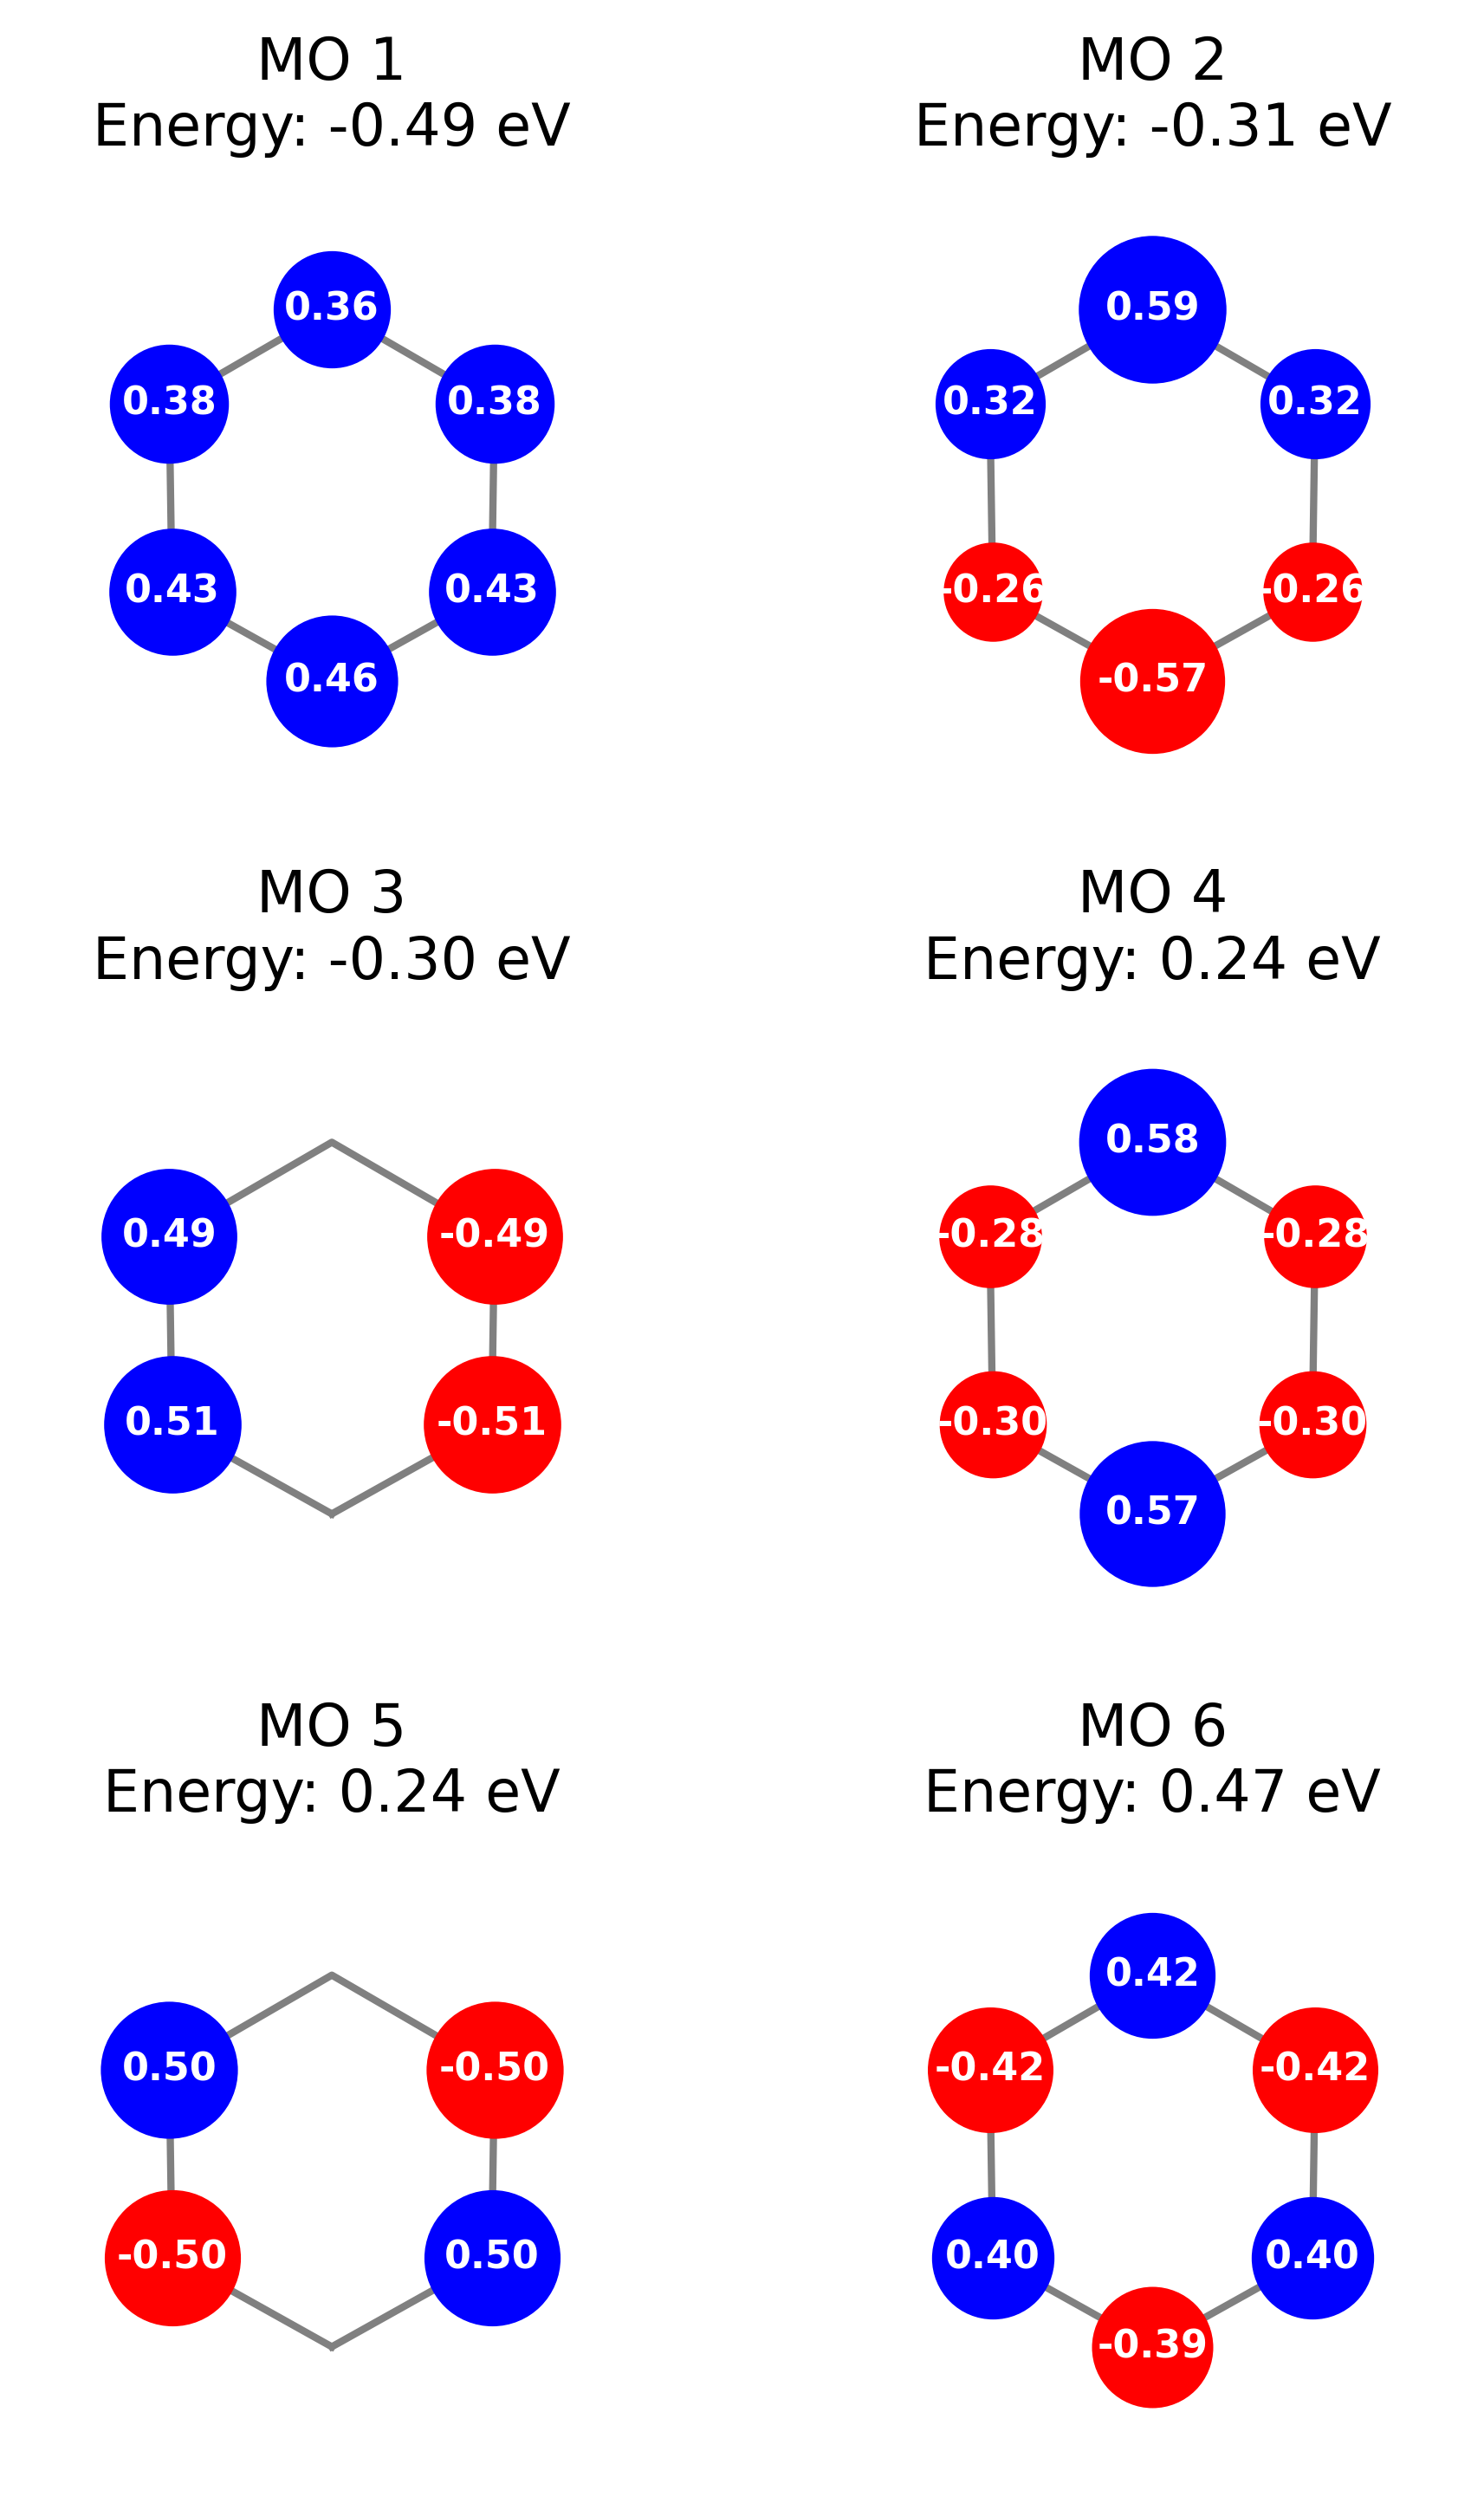

In [9]:
pts.plot_MOs(mo_eigenvalues, pz_AO_MO, coordinates, extra_bounds, fig_size = (5,8))

In [10]:
D = pts.making_D(pz_AO_MO, 6)
print(D)

[[ 1.01336107e+00  6.59247618e-01  1.15727938e-02 -3.40450722e-01
  -1.11996328e-02  6.88970988e-01]
 [ 6.59247618e-01  9.74536257e-01  6.48652049e-01 -9.03038783e-04
  -3.40450722e-01 -1.22183834e-02]
 [ 1.15727938e-02  6.48652049e-01  9.54124486e-01  6.48652049e-01
   1.15727938e-02 -3.26288852e-01]
 [-3.40450722e-01 -9.03038783e-04  6.48652049e-01  9.74536257e-01
   6.59247618e-01 -1.22183834e-02]
 [-1.11996328e-02 -3.40450722e-01  1.15727938e-02  6.59247618e-01
   1.01336107e+00  6.88970988e-01]
 [ 6.88970988e-01 -1.22183834e-02 -3.26288852e-01 -1.22183834e-02
   6.88970988e-01  1.07008086e+00]]


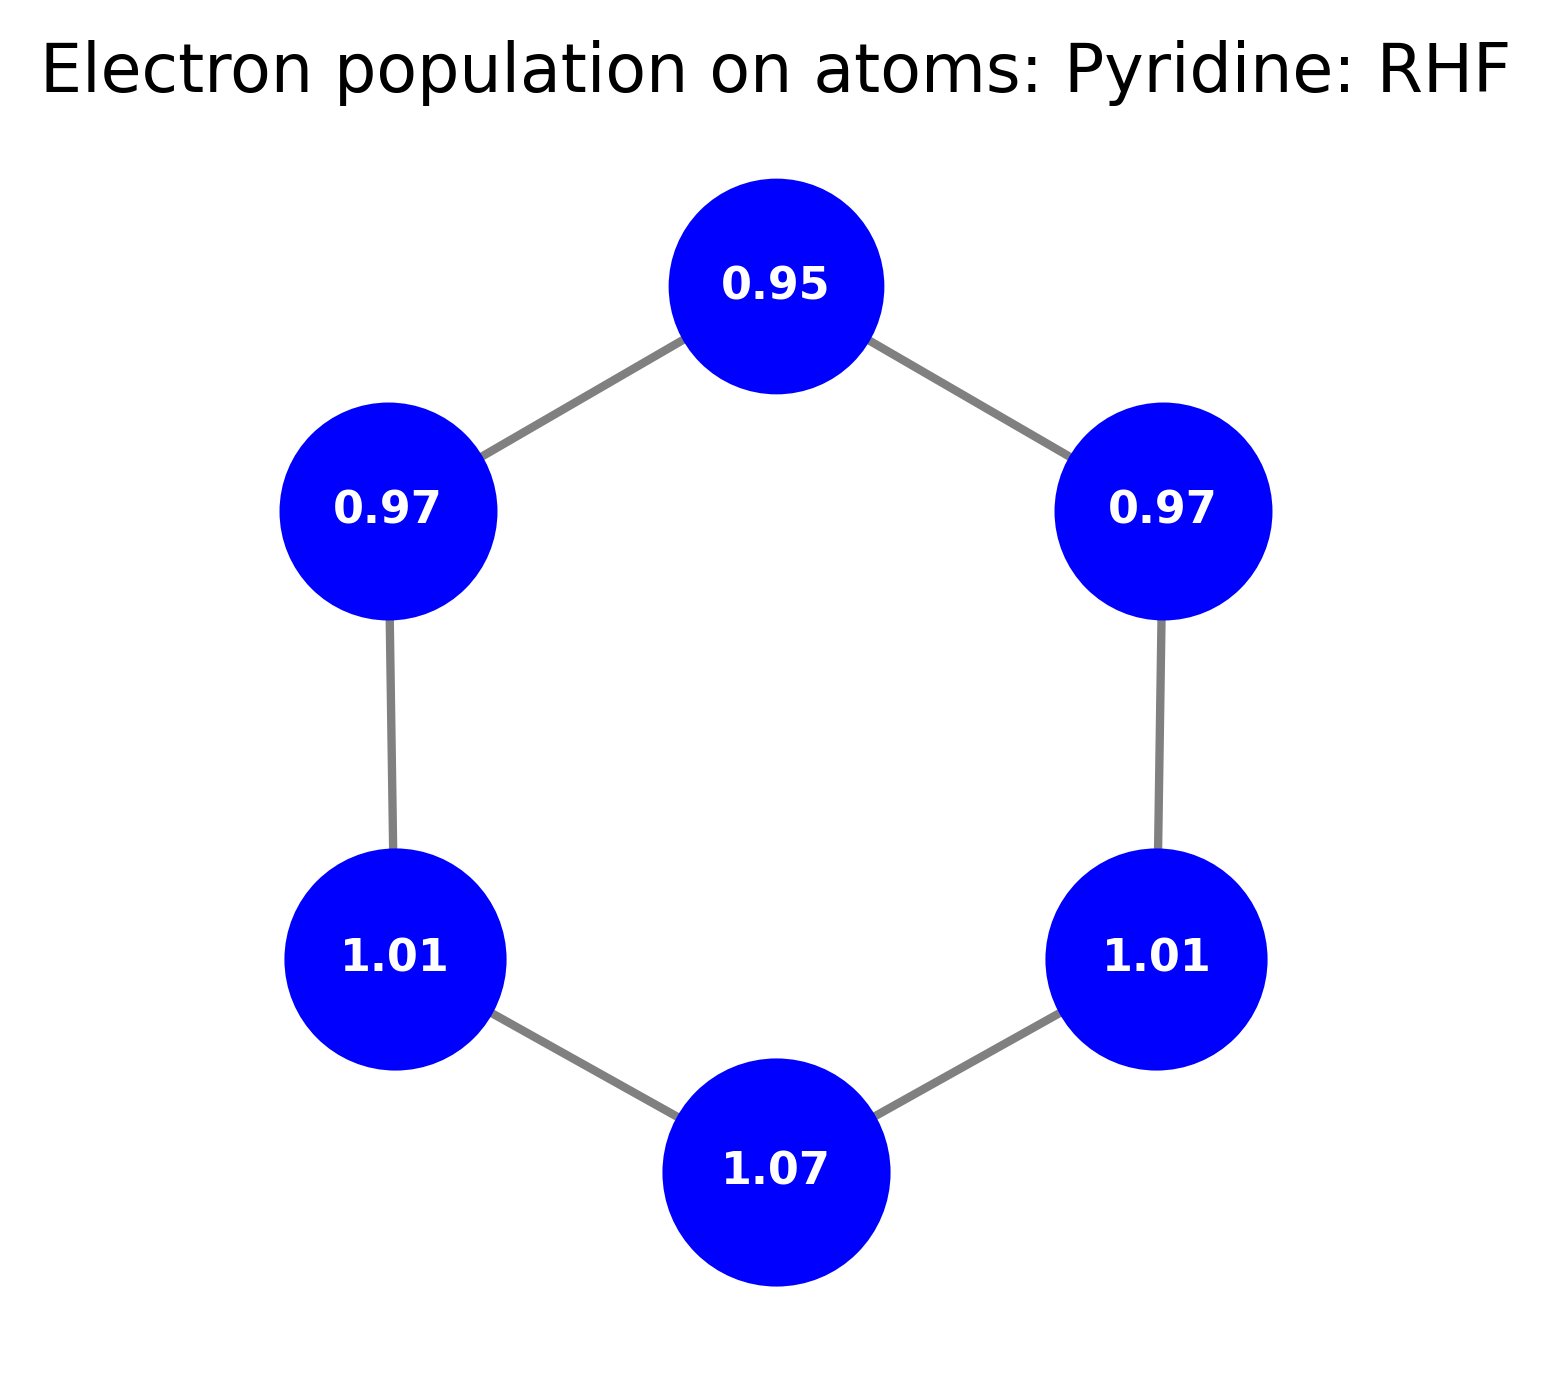

In [11]:
pts.plotting_of_D_atoms(6, coordinates, extra_bounds, D, 'Pyridine', 'RHF')

In [12]:
Pyridine_molecule = gto.M(atom=Pyridine, basis='ccpvdz')#'sto-6g''sto-3g'
pz_indices = pts.taking_indices(Pyridine_molecule, ['C 2pz', 'N 2pz', 'C 3pz', 'N 3pz'])
print(Pyridine_molecule.ao_labels())
print(pz_indices)
hf = scf.RHF(Pyridine_molecule)
hf_energy = hf.kernel()

['0 C 1s    ', '0 C 2s    ', '0 C 3s    ', '0 C 2px   ', '0 C 2py   ', '0 C 2pz   ', '0 C 3px   ', '0 C 3py   ', '0 C 3pz   ', '0 C 3dxy  ', '0 C 3dyz  ', '0 C 3dz^2 ', '0 C 3dxz  ', '0 C 3dx2-y2', '1 C 1s    ', '1 C 2s    ', '1 C 3s    ', '1 C 2px   ', '1 C 2py   ', '1 C 2pz   ', '1 C 3px   ', '1 C 3py   ', '1 C 3pz   ', '1 C 3dxy  ', '1 C 3dyz  ', '1 C 3dz^2 ', '1 C 3dxz  ', '1 C 3dx2-y2', '2 C 1s    ', '2 C 2s    ', '2 C 3s    ', '2 C 2px   ', '2 C 2py   ', '2 C 2pz   ', '2 C 3px   ', '2 C 3py   ', '2 C 3pz   ', '2 C 3dxy  ', '2 C 3dyz  ', '2 C 3dz^2 ', '2 C 3dxz  ', '2 C 3dx2-y2', '3 C 1s    ', '3 C 2s    ', '3 C 3s    ', '3 C 2px   ', '3 C 2py   ', '3 C 2pz   ', '3 C 3px   ', '3 C 3py   ', '3 C 3pz   ', '3 C 3dxy  ', '3 C 3dyz  ', '3 C 3dz^2 ', '3 C 3dxz  ', '3 C 3dx2-y2', '4 C 1s    ', '4 C 2s    ', '4 C 3s    ', '4 C 2px   ', '4 C 2py   ', '4 C 2pz   ', '4 C 3px   ', '4 C 3py   ', '4 C 3pz   ', '4 C 3dxy  ', '4 C 3dyz  ', '4 C 3dz^2 ', '4 C 3dxz  ', '4 C 3dx2-y2', '5 N 1s    ', 

In [13]:
mo_coeff = hf.mo_coeff.round(6)
mo_coeff = pts.normaliseer(mo_coeff)

In [22]:
mo_eigenvalues = hf.mo_energy[[16,19,20,21,22,28]]
print(mo_eigenvalues)
pz_AO_MO = mo_coeff[pz_indices][:, [16,19,20,21,22,28]]

indi = [5, 8, 19, 22, 33, 36, 47, 50, 61, 64, 75, 78]
print(pz_AO_MO)


[-0.52983841 -0.37273959 -0.34564166  0.11525363  0.12806614  0.33513054]
[[ 0.36102744 -0.16038277  0.38866138 -0.1665289   0.25130524 -0.12940259]
 [ 0.21462597 -0.14832346  0.29881599 -0.21898238  0.43799709 -0.37383452]
 [ 0.30368959  0.26908256  0.39148019 -0.13577578 -0.23384115  0.13800261]
 [ 0.17836477  0.21474034  0.32123885 -0.27113876 -0.43389662  0.41249516]
 [ 0.28698897  0.45787473  0.          0.30247775  0.         -0.13275003]
 [ 0.16628567  0.34065338  0.          0.55891699  0.         -0.41160381]
 [ 0.30368959  0.26908256 -0.39148019 -0.13577578  0.23384115  0.13800261]
 [ 0.17836477  0.21474034 -0.32123885 -0.27113876  0.43389662  0.41249516]
 [ 0.36102744 -0.16038277 -0.38866138 -0.1665289  -0.25130524 -0.12940259]
 [ 0.21462597 -0.14832346 -0.29881599 -0.21898238 -0.43799709 -0.37383452]
 [ 0.44090699 -0.4503014  -0.          0.29279932  0.          0.15625764]
 [ 0.29852445 -0.36233867 -0.          0.41202355 -0.          0.30960551]]


In [23]:
D = pts.making_D(pz_AO_MO, 6)
print(D)

[[ 0.61424224  0.43482526  0.4372746   0.30961412  0.06035135  0.01079751
  -0.17133833 -0.18979842  0.01001156 -0.02972768  0.46280023  0.3317768 ]
 [ 0.43482526  0.31471031  0.28449792  0.20484397 -0.01263655 -0.02967533
  -0.18342425 -0.17912124 -0.02972768 -0.04245368  0.32284071  0.23562885]
 [ 0.4372746   0.28449792  0.63577907  0.4754181   0.42072334  0.28432622
   0.02275211 -0.02761648 -0.17133833 -0.18342425  0.02546122 -0.0136805 ]
 [ 0.30961412  0.20484397  0.4754181   0.3622436   0.29902579  0.20562305
  -0.02761648 -0.05053398 -0.18979842 -0.17912124 -0.0361112  -0.04912497]
 [ 0.06035135 -0.01263655  0.42072334  0.29902579  0.58402388  0.40739746
   0.42072334  0.29902579  0.06035135 -0.01263655 -0.15929238 -0.160465  ]
 [ 0.01079751 -0.02967533  0.28432622  0.20562305  0.40739746  0.2873913
   0.28432622  0.20562305  0.01079751 -0.02967533 -0.16016036 -0.14758311]
 [-0.17133833 -0.18342425  0.02275211 -0.02761648  0.42072334  0.28432622
   0.63577907  0.4754181   0.4372

In [24]:
print(np.diag(D))
D_dia = np.diag(D)

[0.61424224 0.31471031 0.63577907 0.3622436  0.58402388 0.2873913
 0.63577907 0.3622436  0.61424224 0.31471031 0.79434066 0.44081232]


In [25]:
lijst = []
for i in range(6):
    m = i*2
    lijst.append(D_dia[m]+D_dia[m+1])
print(lijst)
print(sum(lijst))

[0.9289525460098041, 0.9980226647097347, 0.8714151743710352, 0.9980226647097347, 0.9289525460098041, 1.2351529868551048]
5.960518582665217
